In [13]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [14]:
apps_with_duplicates =  pd.read_csv("googleplaystore.csv")
apps_with_duplicates = apps_with_duplicates.drop(10472)
print(apps_with_duplicates.shape)
apps  = apps_with_duplicates.drop_duplicates()
print(apps.shape)


(10840, 13)
(10357, 13)


In [15]:
chars = ["+", ",", "$"]
cols = [apps_with_duplicates["Installs"], apps_with_duplicates["Price"]]
for col in cols:
    for char in chars:
            apps["Installs"] = apps["Installs"].str.replace(f"{char}", "",regex=True)
            apps["Price"] = apps["Price"].str.replace(f"{char}", "",regex=True)

In [16]:
apps['Installs'] = apps['Installs'].astype(float)
apps['Price'] = pd.to_numeric(apps['Price'], errors="raise")
print(apps["Installs"].dtype)
print(apps["Price"].dtype)

float64
float64


Number of categories =  33


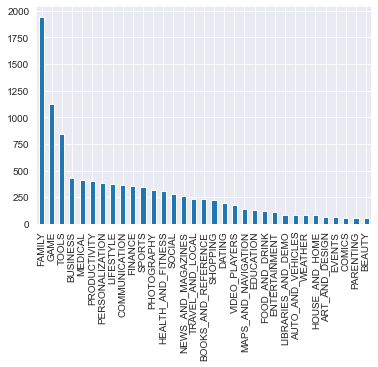

In [6]:
num_categories = apps.Category.unique()

num_apps_in_category = apps["Category"].value_counts(sort=True)

num_len_categories = len(apps.Category.unique())
print('Number of categories = ', num_len_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps["Category"].value_counts(sort=True)
num_apps_in_category.plot(x="Category", kind="bar")
plt.show()


Average app rating =  4.187876743139902


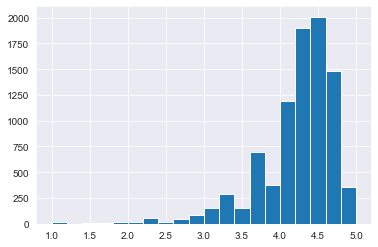

In [7]:
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

plt.hist(apps["Rating"], bins=20)
plt.show()


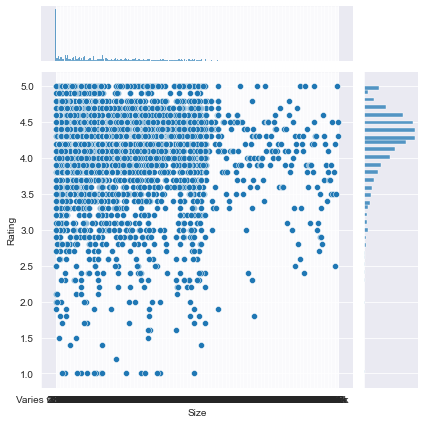

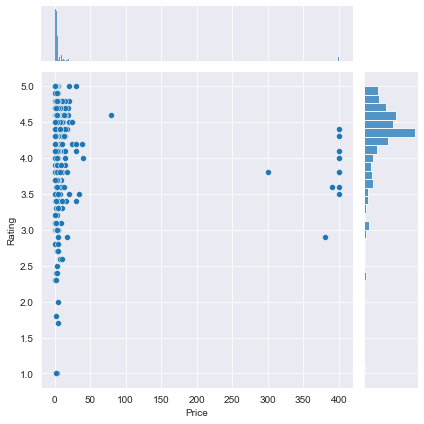

In [17]:
%matplotlib inline

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps.dropna(subset=["Rating", "Size"])

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"])

# # Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present.Type == "Paid"]

# # Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

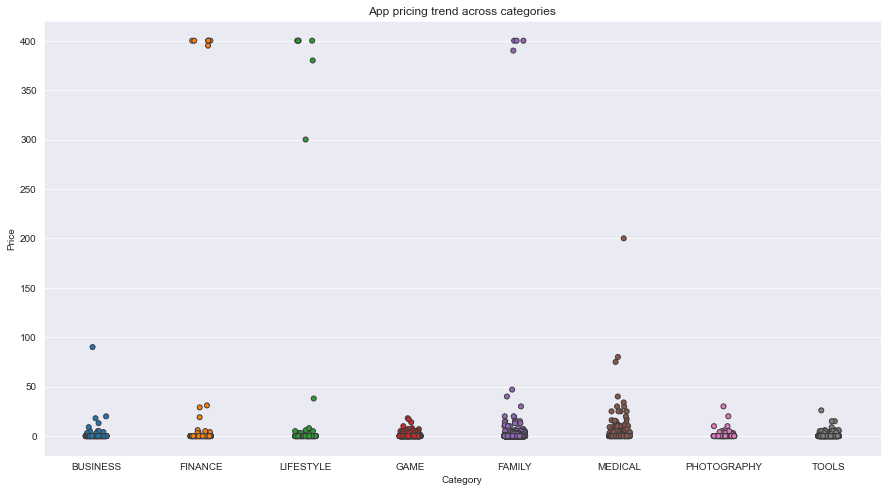

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Category"], y = popular_app_cats["Price"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps.Price > 200]
apps_above_200 = apps_above_200[['Category', 'App', 'Price']]

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

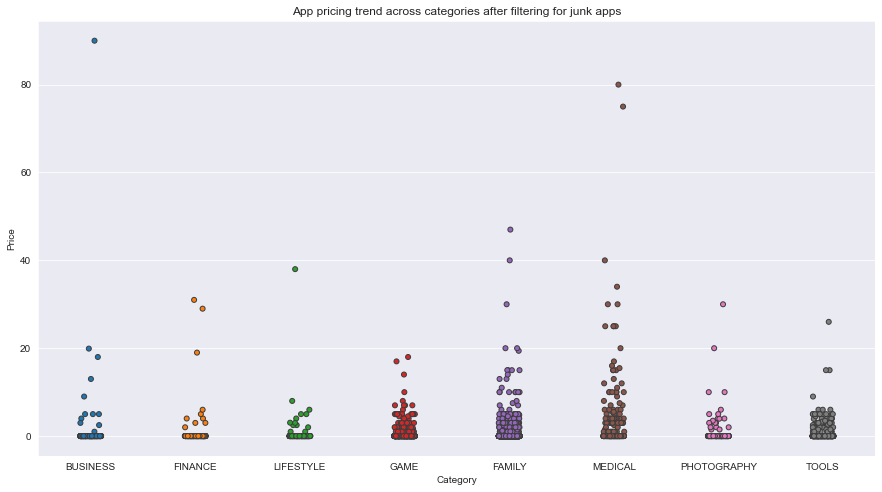

In [9]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats.Price < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = apps_under_100["Category"], y = apps_under_100["Price"], data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [10]:
import plotly
# plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

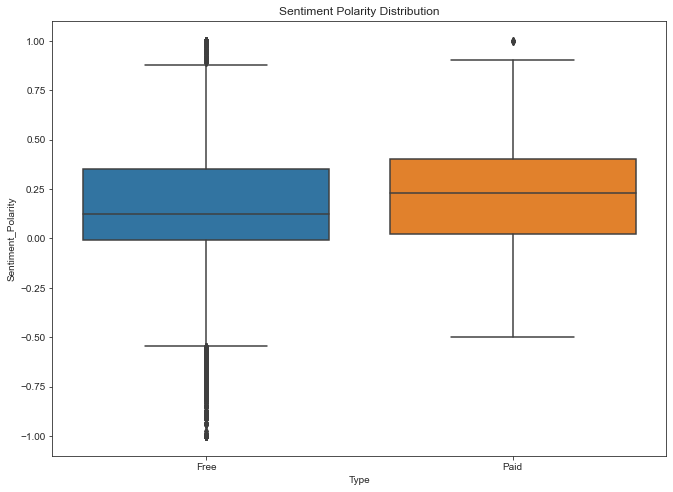

In [11]:
# Load user_reviews.csv
reviews_df = pd.read_csv("user_reviews.csv")

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df)

# # Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = merged_df["Type"], y = merged_df["Sentiment_Polarity"], data = merged_df)
ax.set_title('Sentiment Polarity Distribution')